In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

#### Load the datasets for keras

##### Fashion mnist datasets

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [73]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [74]:
# print(fashion_mnist.feature_names)

AttributeError: module 'tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist' has no attribute 'feature_names'

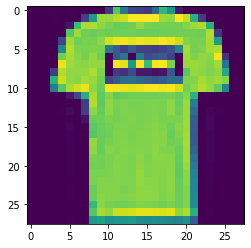

In [5]:
plt.imshow(X_train_full[1])

In [6]:
y_train_full[1]

0

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [8]:
class_names[y_train_full[1]]

'T-shirt/top'

In [9]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization
This is done to achieve the same scale in the data dimention. Since we know the range of our data which 0-255 thus we divide the data with 255

In [10]:
X_train_sca = X_train_full / 255.
X_test_sca = X_test / 255.

### Split the data into train, valdation and test

In [11]:
X_valid, X_train = X_train_sca[:5000], X_train_sca[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Assigning X_test_sca to X_test
X_test_sca = X_test

In [12]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Crete the model architecture
There are two APIs for defining a model in keras:
* Sequential model API: It is simple and it is use to create layer by layer model. All output of the previous layers are connected to the input of next layer

* Funtional API: It is for a complex model. It is recommended when input will be supplied as difference layer

In [13]:
# this is to achieve the result 

np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten is used to convert the 28x28 array of the dataset to pixel
model.add(keras.layers.Dense(300, activation='relu')) # 300 rep the neurons 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


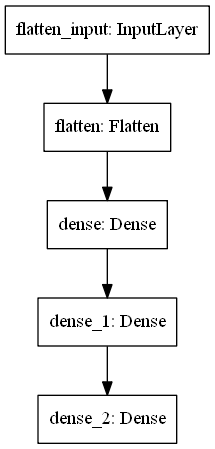

In [16]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

## Training of the dataset
Note:

The 'loss' value is chosen because y data is in form of label, that is wee have 10 labels e.g boot etc.

sgd: Stochastic Gradient Descent, this is telling keras to do Back propagation algorithm

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=['accuracy'])

In [63]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.4803 - val_accuracy: 0.8988
Epoch 2/30
55000/55000 [==============================] - 10s 176us/sample - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.4525 - val_accuracy: 0.9028
Epoch 3/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.4775 - val_accuracy: 0.8974
Epoch 4/30
55000/55000 [==============================] - 10s 177us/sample - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.4780 - val_accuracy: 0.9006
Epoch 5/30
55000/55000 [==============================] - 9s 155us/sample - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.4851 - val_accuracy: 0.8996
Epoch 6/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.4947 - val_accuracy: 0.9006
Epoch 7/30
55000/55000 [=========================

In [64]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [65]:
model_history.history

{'loss': [0.02510561772156507,
  0.02932543025046841,
  0.025046478998915038,
  0.023732173903015526,
  0.02508677939599888,
  0.022136825484359128,
  0.023406835479898885,
  0.0227505870541727,
  0.021928187628556042,
  0.021574221270802347,
  0.021283406141010874,
  0.021320918550875714,
  0.020499856516718866,
  0.017614412832353266,
  0.02103770328910852,
  0.019164694200134412,
  0.016845651574305853,
  0.015273321834892373,
  0.01845293603761291,
  0.01802315497253175,
  0.016036028837941755,
  0.01708727537802505,
  0.014884213968298652,
  0.015974489776409147,
  0.016456948179870166,
  0.013288603202981706,
  0.01738950758448548,
  0.012199934262816202,
  0.012825894550200213,
  0.012090569470954044],
 'accuracy': [0.9930364,
  0.99134547,
  0.9924727,
  0.99292725,
  0.9927273,
  0.9938545,
  0.9933818,
  0.9933636,
  0.9940182,
  0.99436367,
  0.99436367,
  0.9945091,
  0.9948182,
  0.99594545,
  0.9940364,
  0.9951091,
  0.99585456,
  0.99676365,
  0.9946727,
  0.9954727,
  

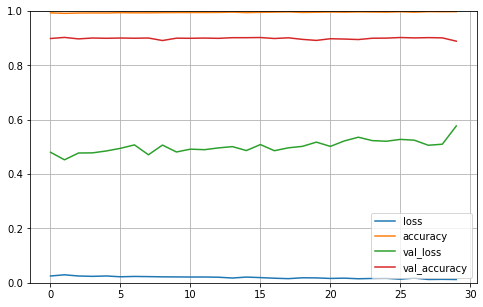

In [66]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model

In [67]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 168us/sample - loss: 166.3748 - accuracy: 0.8458


[166.37483827819824, 0.8458]

In [68]:
X_new = X_test[:3]

In [69]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [70]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [71]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


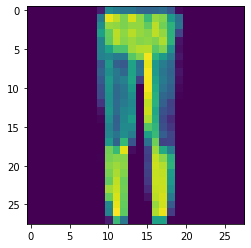

In [72]:
print(plt.imshow(X_test[3]))